In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
path = r"C:\Users\khush\OneDrive\Documents\Insider-trading\insider-trading-signal\ETL\final_data_2025Q1.parquet"

df = pd.read_parquet(path, engine="fastparquet")
df.head(20)

,side,log_dollar_value,role,is_10b5_1,log_size_vs_cap,label_up_market
3,sell,15.441086,OFFICER,0,-9.087956,1
4,sell,14.496378,DIRECTOR,0,-10.032665,1
5,buy,13.401964,OFFICER,0,-9.559271,1
6,sell,14.673079,OFFICER,1,-10.128313,0
7,sell,11.586464,DIRECTOR,1,-13.214937,0
8,sell,15.554449,OFFICER,1,-9.246943,0
9,sell,13.269491,OFFICER,0,-10.009910,0
10,sell,15.226362,OFFICER,0,-8.053038,0
11,sell,13.603320,DIRECTOR,0,-9.676081,0
19,sell,11.336200,OFFICER,0,-11.597717,1


In [3]:
df_encoded = pd.get_dummies(df, columns=['side', 'role'], drop_first=True)

In [4]:
target_col = 'label_up_market'
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,       # Limit depth to prevent overfitting noise
    min_samples_leaf=5, # Each leaf must have at least 5 trades
    random_state=42,
    n_jobs=-1
)

In [7]:
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

Training Random Forest...


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
print("--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Random Forest Performance ---
Accuracy: 0.6209

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73      1058
           1       0.57      0.27      0.36       720

    accuracy                           0.62      1778
   macro avg       0.60      0.56      0.55      1778
weighted avg       0.61      0.62      0.58      1778



In [10]:
importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

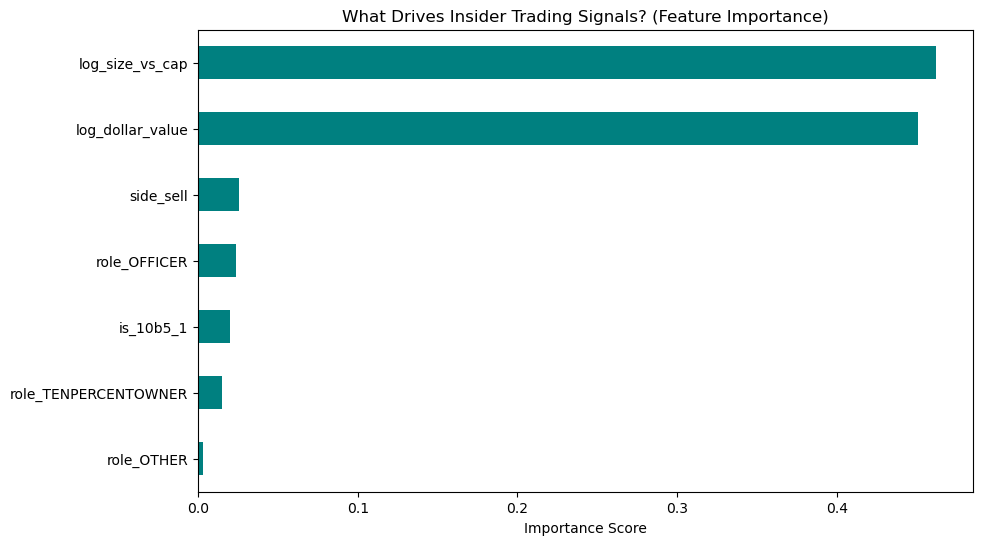

In [11]:
plt.figure(figsize=(10, 6))
importance.plot(kind='barh', color='teal')
plt.title("What Drives Insider Trading Signals? (Feature Importance)")
plt.xlabel("Importance Score")
plt.show()